In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/train.csv")

# Display the first few rows of the dataset
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


2. Data Preprocessing

In [2]:
print(df.columns)

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


Data Preprocessing

sl_no                     0
gender                    0
ssc_p                     0
hsc_p                     0
degree_p                  0
etest_p                   0
mba_p                     0
status                    0
salary                   67
ssc_b_Others              0
hsc_b_Others              0
hsc_s_Commerce            0
hsc_s_Science             0
degree_t_Others           0
degree_t_Sci&Tech         0
workex_Yes                0
specialisation_Mkt&HR     0
dtype: int64
            sl_no      gender       ssc_p       hsc_p    degree_p     etest_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000    0.353488   67.303395   66.333163   66.370186   72.100558   
std     62.209324    0.479168   10.827205   10.897509    7.358743   13.275956   
min      1.000000    0.000000   40.890000   37.000000   50.000000   50.000000   
25%     54.500000    0.000000   60.600000   60.900000   61.000000   60.000000   
50%    108.000000    0.00

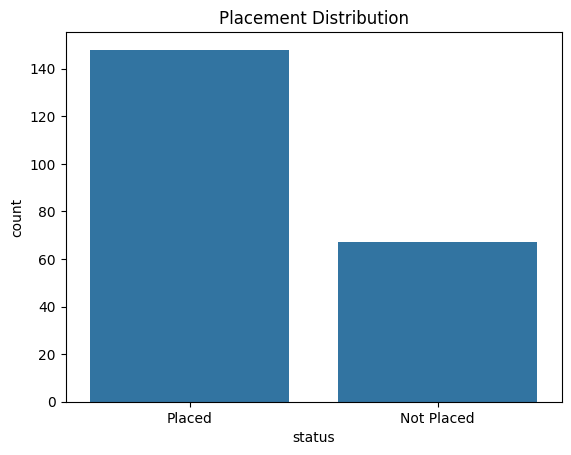

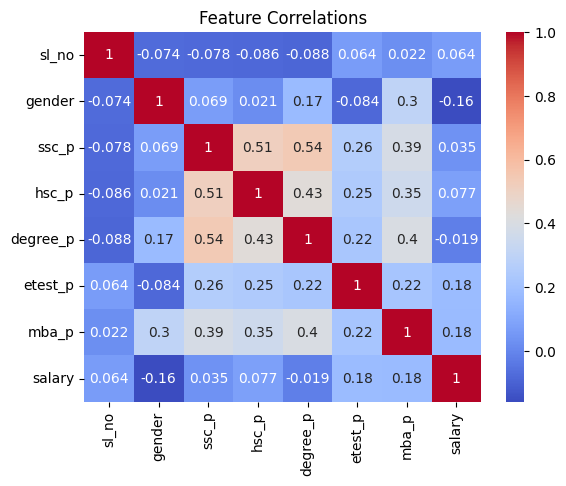

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np





# Assuming 'status' is the target variable,
# identify categorical features and convert them to numerical using one-hot encoding
categorical_features = df.select_dtypes(include=['object']).columns

# Remove the target variable if it's included in categorical_features
if 'status' in categorical_features:
    categorical_features = categorical_features.drop('status')

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)  # drop_first avoids multicollinearity



# Check for missing values
print(df_encoded.isnull().sum())

# Basic statistics and summary of the dataset
print(df_encoded.describe())

# Visualize the distribution of the target variable
sns.countplot(x='status', data=df_encoded) # Changed df to df_encoded
plt.title('Placement Distribution')
plt.show()

# Visualize feature correlations using the encoded DataFrame
# Exclude the 'status' column from the correlation calculation
numerical_df = df_encoded.select_dtypes(include=np.number)  # Select only numerical columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

Handle Missing Values

In [4]:

# Fill missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if there are any missing values left
print(df.isnull().sum())

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


Encode Categorical Variables

In [5]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Display the dataframe after encoding
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


Split Data into Training and Test Sets

In [6]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(columns=['status'])
y = df['status']

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(150, 14) (65, 14) (150,) (65,)


3. Model Selection

Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# XGBoost Classifier

In [10]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:27:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

4. Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    return accuracy, precision, recall, f1, conf_matrix

# Evaluate all models
print("Logistic Regression Evaluation:")
evaluate_model(log_reg, X_test, y_test)

print("\nRandom Forest Evaluation:")
evaluate_model(rf_classifier, X_test, y_test)

print("\nXGBoost Evaluation:")
evaluate_model(xgb_classifier, X_test, y_test)


Logistic Regression Evaluation:
Accuracy: 0.8462
Precision: 0.8696
Recall: 0.9091
F1-score: 0.8889
Confusion Matrix:
[[15  6]
 [ 4 40]]

Random Forest Evaluation:
Accuracy: 0.8923
Precision: 0.8776
Recall: 0.9773
F1-score: 0.9247
Confusion Matrix:
[[15  6]
 [ 1 43]]

XGBoost Evaluation:
Accuracy: 0.9692
Precision: 1.0000
Recall: 0.9545
F1-score: 0.9767
Confusion Matrix:
[[21  0]
 [ 2 42]]


(0.9692307692307692,
 1.0,
 0.9545454545454546,
 0.9767441860465116,
 array([[21,  0],
        [ 2, 42]]))

5. Voting Classifier

In [13]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier with Logistic Regression, Random Forest, and XGBOOST
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf_classifier),
    ('xgb', xgb_classifier)
], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
print("\nVoting Classifier Evaluation:")
evaluate_model(voting_clf, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:28:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Voting Classifier Evaluation:
Accuracy: 0.9538
Precision: 0.9556
Recall: 0.9773
F1-score: 0.9663
Confusion Matrix:
[[19  2]
 [ 1 43]]


(0.9538461538461539,
 0.9555555555555556,
 0.9772727272727273,
 0.9662921348314607,
 array([[19,  2],
        [ 1, 43]]))

6. Visualize Model Performance

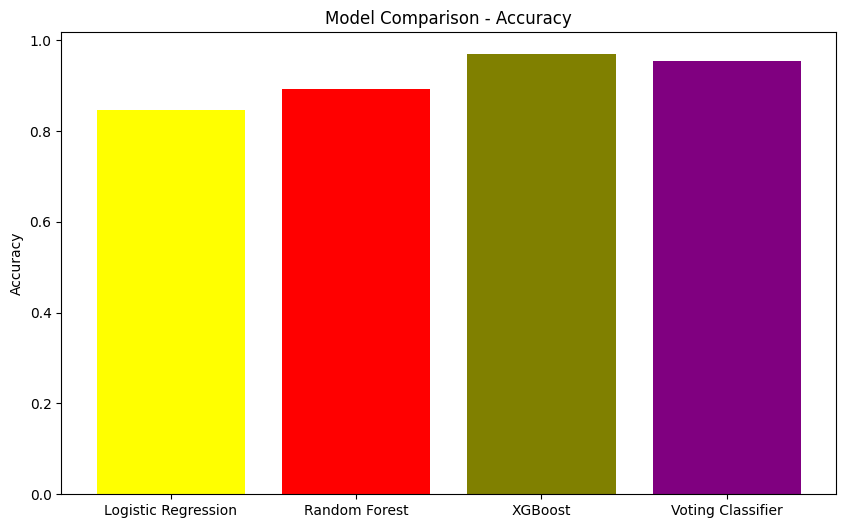

In [18]:
# Comparison of accuracies
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test)),
    accuracy_score(y_test, rf_classifier.predict(X_test)),
    accuracy_score(y_test, xgb_classifier.predict(X_test)),
    accuracy_score(y_test, voting_clf.predict(X_test))
]

models = ['Logistic Regression', 'Random Forest','XGBoost' , 'Voting Classifier']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['yellow', 'red', 'olive', 'purple'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()
